# import library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as dt
import time

In [2]:
df = pd.read_csv("C:\\Users\\FPTSHOP\\Downloads\\shopeep_koreantop_clothing_shop_data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pk_shop             746 non-null    int64  
 1   date_collected      746 non-null    object 
 2   shopid              746 non-null    int64  
 3   name                746 non-null    object 
 4   join_month          746 non-null    object 
 5   join_day            746 non-null    int64  
 6   join_year           746 non-null    int64  
 7   item_count          746 non-null    int64  
 8   follower_count      746 non-null    int64  
 9   response_time       746 non-null    object 
 10  response_rate       746 non-null    int64  
 11  shop_location       428 non-null    object 
 12  rating_bad          746 non-null    int64  
 13  rating_good         746 non-null    int64  
 14  rating_normal       746 non-null    int64  
 15  rating_star         740 non-null    float64
 16  is_shope

In [4]:
df.head()

,pk_shop,date_collected,shopid,name,join_month,join_day,join_year,item_count,follower_count,response_time,response_rate,shop_location,rating_bad,rating_good,rating_normal,rating_star,is_shopee_verified,is_official_shop
0,20210613254711738,2021-06-13,254711738,hello.may.ph,April,27,2020,446,17487,10:13:55,96,NaN,181,17510,729,4.81,1,0
1,20210613314198143,2021-06-13,314198143,love.women.shop,September,25,2020,263,8574,10:43:05,73,"San Nicolas,Metro Manila",78,2656,198,4.68,0,0
2,2021061310377223,2021-06-13,10377223,R&O RedOrange,September,27,2016,209,660417,08:32:07,90,"Pasay City,Metro Manila",4647,1071829,18073,4.91,1,0
3,2021061321407329,2021-06-13,21407329,patriciacai,April,30,2017,165,18787,09:10:38,94,"Binondo,Metro Manila",44,18959,215,4.94,1,0
4,2021061311187885,2021-06-13,11187885,Little Market Manila,October,18,2016,467,67371,11:40:59,89,"Caloocan City,Metro Manila",680,39252,2383,4.73,1,0


# Vẽ biểu đồ so sánh số lượng shop gia nhập theo các năm.

In [5]:
df1 = df[['join_year', 'shopid']]

In [6]:
df1.head()

,join_year,shopid
0,2020,254711738
1,2020,314198143
2,2016,10377223
3,2017,21407329
4,2016,11187885


In [7]:
 df_number = df1.groupby(['join_year']).count()

In [8]:
df_number = df_number.reset_index()

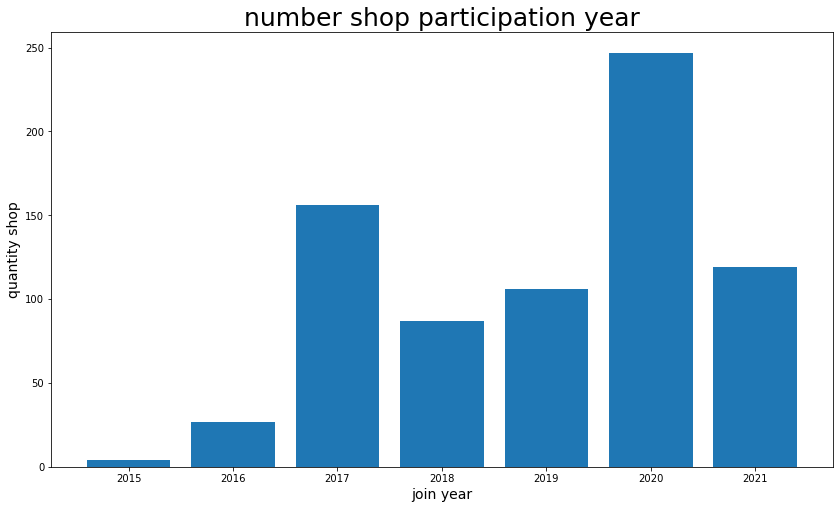

In [9]:
plt.figure(figsize = (14,8))
plt.bar(df_number['join_year'], df_number['shopid'])
plt.title("number shop participation year", fontsize = 25)
plt.xlabel("join year", fontsize = 14)
plt.ylabel("quantity shop", fontsize = 14)
plt.show()

# Vẽ biểu đồ thể hiện mối quan hệ giữa tỉ lệ phản hồi với số lượt khách hàng đánh giá tốt.

In [10]:
# ranting bad
df2 = df[['rating_bad', 'rating_good', 'rating_normal']]

In [11]:
df2.head()

,rating_bad,rating_good,rating_normal
0,181,17510,729
1,78,2656,198
2,4647,1071829,18073
3,44,18959,215
4,680,39252,2383


In [12]:
df2 = df2.sum()

In [13]:
total = df2.sum()

In [14]:
df2.rating_good

72516319

In [15]:
listName = ["rating_good", "total_rating"]
data = [df2.rating_good, total]

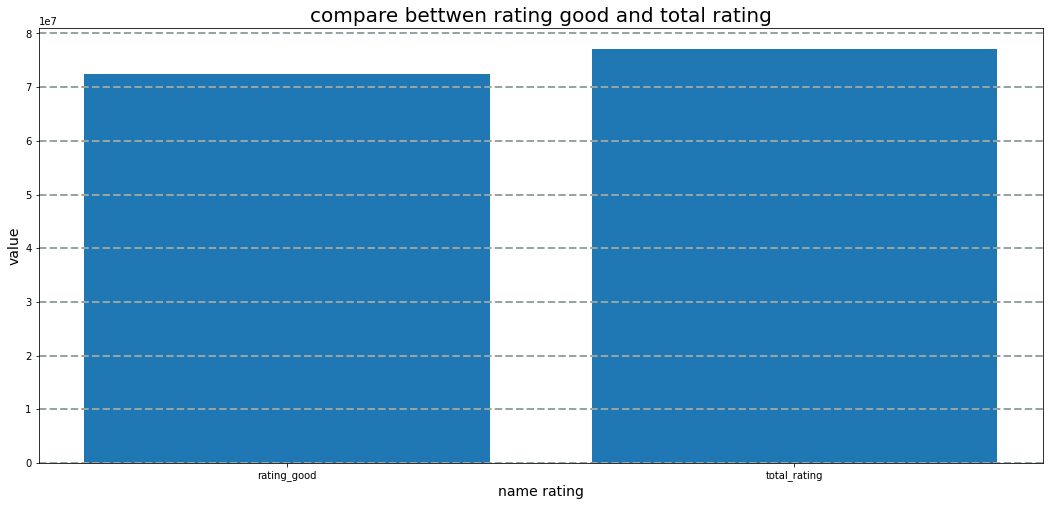

In [16]:
plt.figure(figsize = (18,8))
plt.title("compare bettwen rating good and total rating", fontsize = 20)
plt.bar(listName, data)
plt.xlabel("name rating", fontsize = 14, alpha=1)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=1)
plt.ylabel("value", fontsize = 14)
plt.show()

# Vẽ biểu đồ thể hiện mối quan hệ giữa thời gian phản hồi (đơn vị giây) với số lượt khách hàng đánh giá xấu.

In [17]:
df_timeRatingBad = df[['response_time', 'rating_bad']]

In [18]:
df_timeRatingBad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   response_time  746 non-null    object
 1   rating_bad     746 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.8+ KB


In [19]:
df_timeRatingBad.head()

,response_time,rating_bad
0,10:13:55,181
1,10:43:05,78
2,08:32:07,4647
3,09:10:38,44
4,11:40:59,680


In [20]:
df_timeRatingBad['response_time'].unique()

array([' 10:13:55', ' 10:43:05', ' 08:32:07', ' 09:10:38', ' 11:40:59',
       ' 12:33:58', ' 11:00:46', ' 11:03:13', ' 10:14:49', ' 09:41:23',
       ' 08:55:06', ' 12:07:08', ' 11:57:43', ' 10:43:46', ' 11:46:01',
       ' 09:36:00', ' 10:28:02', ' 08:05:48', ' 10:13:30', ' 10:03:06',
       ' 09:34:41', ' 09:52:55', ' 11:25:23', ' 09:26:55', ' 14:56:24',
       ' 11:43:29', ' 13:09:38', ' 11:14:33', ' 09:44:54', ' 08:35:40',
       ' 11:43:52', ' 09:37:23', ' 11:03:30', ' 09:13:35', ' 10:13:24',
       ' 10:40:12', ' 08:28:44', ' 11:45:05', ' 13:16:46', ' 12:48:36',
       ' 10:58:45', ' 11:42:04', ' 08:25:22', ' 08:07:02', ' 11:01:08',
       ' 11:49:38', ' 09:56:42', ' 11:32:50', ' 11:00:36', ' 10:10:57',
       ' 11:41:13', ' 11:45:46', ' 11:30:22', ' 09:05:28', ' 10:40:10',
       ' 12:45:44', ' 09:30:37', ' 12:06:34', ' 09:19:38', ' 10:24:59',
       ' 12:30:35', ' 09:42:10', ' 08:54:58', ' 08:38:18', ' 11:21:03',
       ' 10:54:52', ' 09:30:18', ' 08:00:13', ' 12:23:35', ' 11:

In [21]:
df_timeRatingBad['rating_bad'].unique()

array([   181,     78,   4647,     44,    680,      0,     87,    354,
          679,   4524,     21,   3960,    809,   1809,      6,    452,
         2353,   7797,     38,    289,      4,    269,      1,      5,
          299,     13,     62,     80,     33,   2432,     76,  21494,
           29,    111,   1023,   1912,     19,     70,  60527,   3720,
           81,    129,    424,    561,     66,    113,    344,   1351,
          533,     15,     53,    161,      3,    225,    122,    142,
          170,     37,    278,  20771,    160,     10,   3485,   1424,
          108,   2419,     74,    502,    322,     23,    133,    204,
           61,      8,    286,     58,    652,     67,    126,   1793,
           88,     17,    456,   1932,     32,    631,    128,    732,
         6074,    152,    714,    779,     14,   2400,    721,    207,
           22,     68,    184,   1220,   6536,   1248,    164,   1430,
          174,   7581,  10544,    719,   1702,    217,    326,     45,
      

In [22]:
df_timeRatingBad = df_timeRatingBad.sort_values(by = 'response_time')

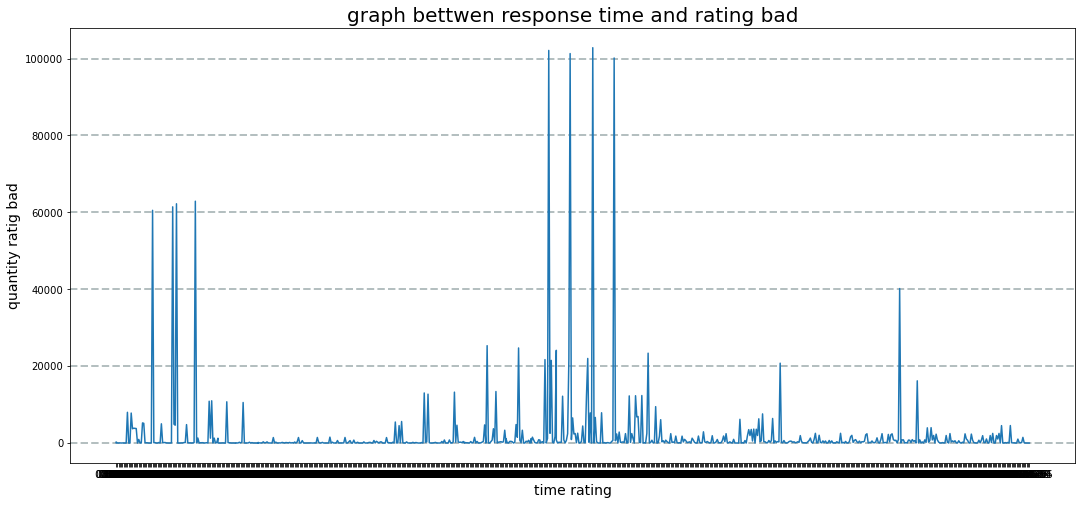

In [23]:
plt.figure(figsize = (18,8))
plt.plot(df_timeRatingBad['response_time'],df_timeRatingBad['rating_bad'])
plt.title("graph bettwen response time and rating bad", fontsize = 20)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xlabel("time rating", fontsize = 14)
plt.ylabel("quantity ratig bad", fontsize =14)
plt.show()

# Vẽ biểu đồ thể hiện xu hướng của số lượng shop gia nhập theo thời gian.

In [24]:
df_joinShopByYear = df[['join_month', 'join_year', 'shopid']]

In [25]:
df_joinShopByYear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   join_month  746 non-null    object
 1   join_year   746 non-null    int64 
 2   shopid      746 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 17.6+ KB


In [26]:
df_joinShopByYear.head()

,join_month,join_year,shopid
0,April,2020,254711738
1,September,2020,314198143
2,September,2016,10377223
3,April,2017,21407329
4,October,2016,11187885


In [27]:
df_joinShopByYear['join_year'].unique()

array([2020, 2016, 2017, 2021, 2019, 2018, 2015], dtype=int64)

In [28]:
df_2020 = df_joinShopByYear.iloc[df_joinShopByYear[df_joinShopByYear['join_year'] == 2020].index, :]

In [29]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247 entries, 0 to 743
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   join_month  247 non-null    object
 1   join_year   247 non-null    int64 
 2   shopid      247 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.7+ KB


In [48]:
year = list(df_joinShopByYear['join_year'].unique())
dfy = pd.DataFrame()
listDataYear = []
for i in range(len(year)):
    dfy = df_joinShopByYear.iloc[df_joinShopByYear[df_joinShopByYear['join_year'] == year[i]].index, :]
    dfy =  dfy.groupby('join_month').count()
    dfy = dfy.reset_index()
    dfy['join_month'] = pd.to_datetime(dfy['join_month'], format='%B').dt.month
    dfy = dfy.sort_values(by='join_month')
    listDataYear.append(dfy)

In [49]:
listDataYear[0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 3 to 2
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   join_month  11 non-null     int64
 1   join_year   11 non-null     int64
 2   shopid      11 non-null     int64
dtypes: int64(3)
memory usage: 352.0 bytes


In [50]:
listDataYear[1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 1 to 2
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   join_month  5 non-null      int64
 1   join_year   5 non-null      int64
 2   shopid      5 non-null      int64
dtypes: int64(3)
memory usage: 160.0 bytes


In [51]:
listDataYear[2].head(13)

,join_month,join_year,shopid
4,1,2,2
3,2,2,2
7,3,8,8
0,4,8,8
8,5,4,4
6,6,7,7
5,7,3,3
1,8,12,12
11,9,36,36
10,10,32,32


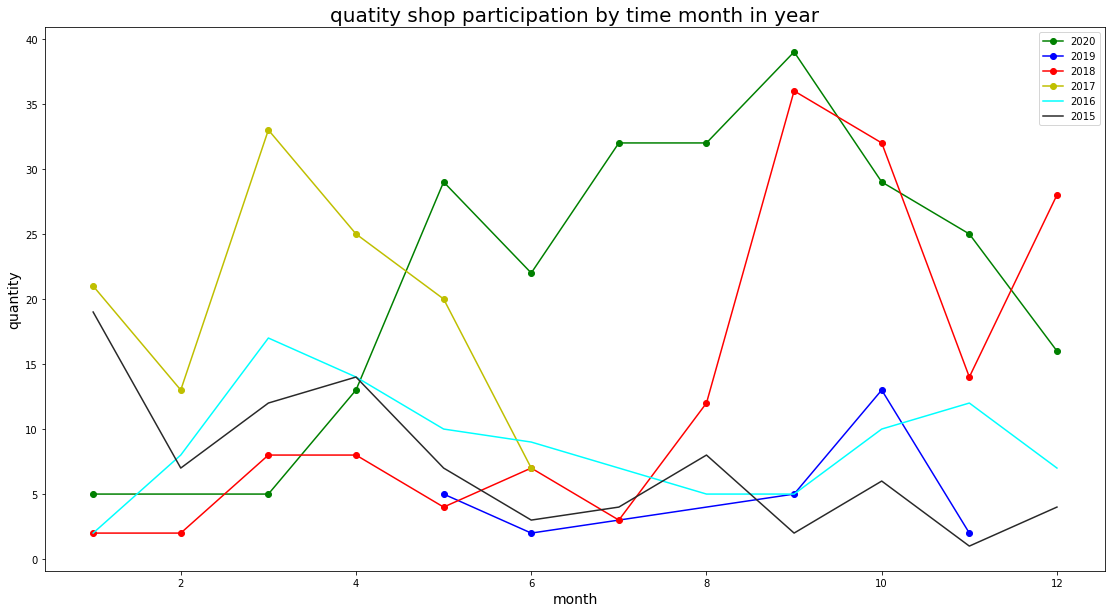

In [43]:

plt.figure( figsize = (19,10))
# plot two lines
plt.plot(listDataYear[0]['join_month'], listDataYear[0]['shopid'], 'o-g')
plt.plot(listDataYear[1]['join_month'], listDataYear[1]['shopid'], 'o-b')
plt.plot(listDataYear[2]['join_month'], listDataYear[2]['shopid'], 'o-r')
plt.plot(listDataYear[3]['join_month'], listDataYear[3]['shopid'],'o-y')
plt.plot(listDataYear[4]['join_month'], listDataYear[4]['shopid'], 'aqua')
plt.plot(listDataYear[5]['join_month'], listDataYear[5]['shopid'], '#292929')
# set axis titles
plt.ylabel("quantity", fontsize = 14)
plt.xlabel("month", fontsize = 14)
# set chart title
plt.title("quatity shop participation by time month in year", fontsize = 20)
# legend
plt.legend(['2020', '2019','2018', '2017', '2016', '2015'])
plt.show()